In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chapter 1: Loading the data

In [3]:
df = pd.read_csv('smartphone_cleaned_v5.csv')

df

/home/u203094/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1595: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/home/u203094/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/home/u203094/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/home/u203094/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1595: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/home/u203094/.local/lib/python3.9/site-packages/pandas/io/formats/format.py:1596: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any(

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,6.67,120,1080 x 2460,3,1.0,android,64.0,16.0,0,NaN
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,6.50,60,720 x 1600,3,1.0,android,48.0,8.0,1,1024.0
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,6.60,144,1080 x 2460,3,1.0,android,64.0,16.0,0,NaN
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,6.80,60,1080 x 2400,3,1.0,android,108.0,32.0,1,1024.0


In [4]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [5]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


# Chapter 2: Basic Overview of the Data

<Axes: xlabel='brand'>

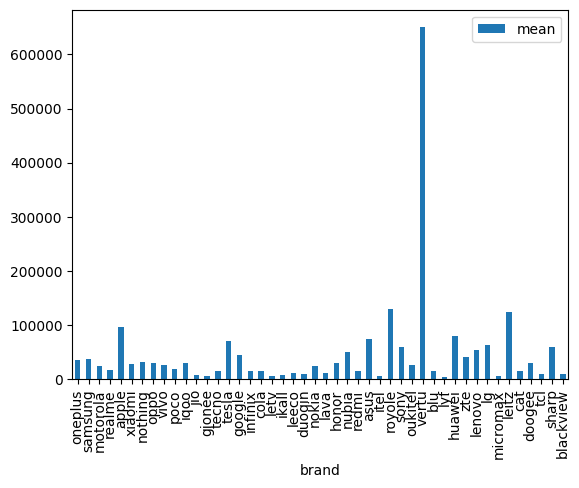

In [6]:
from statistics import mean 
brands = df['brand_name'].unique()
means = []
for brand in brands:
    df2 = df[df['brand_name'] == brand]
    avg = mean(df2['price'])
    means.append(avg)

df3 = pd.DataFrame({'brand':brands, 'mean':means})
df3.set_index('brand')
df3.set_index('brand').plot(kind='bar')


That is a lot of different brands. Let's just take the top 5 most popular

<Axes: xlabel='brand_name'>

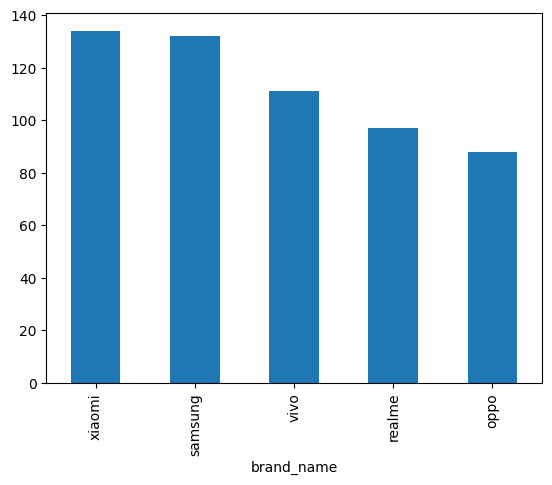

In [7]:
df['brand_name'].value_counts().head(5).plot(kind='bar')

<Axes: ylabel='count'>

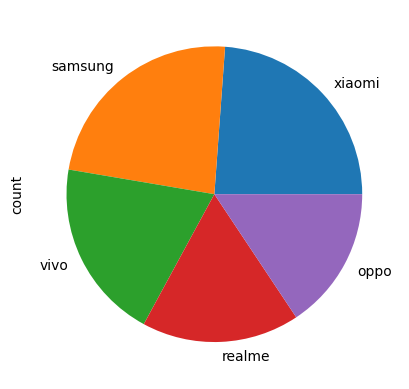

In [8]:
df['brand_name'].value_counts().head(5).plot(kind='pie')

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

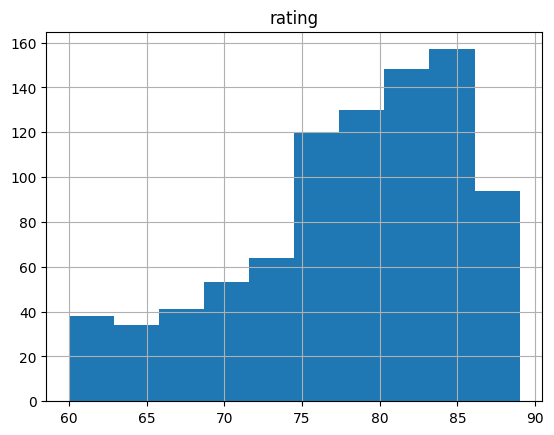

In [9]:
df.hist(column='rating')

# Chapter 3: Looking at price vs. other aspects

/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


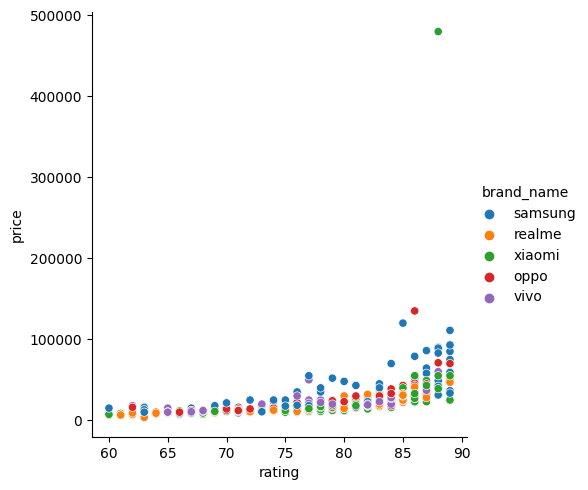

In [10]:
top5 = ['xiaomi','samsung','vivo','realme','oppo']
df2 = df[df['brand_name'].isin(top5)]
sns.relplot(y='price',x='rating',hue='brand_name',data=df2)

/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


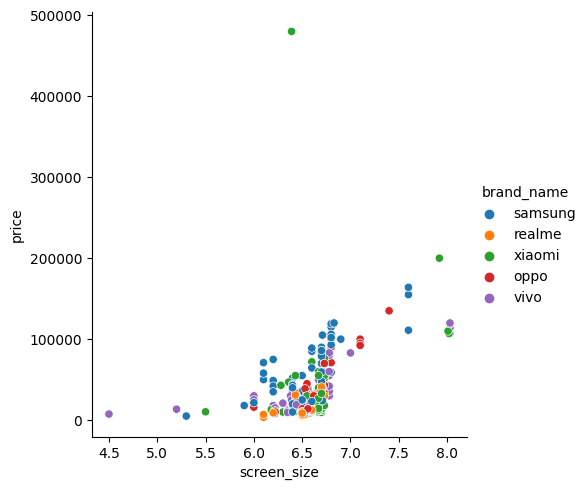

In [11]:
sns.relplot(y='price',x='screen_size',hue='brand_name',data=df2)

/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


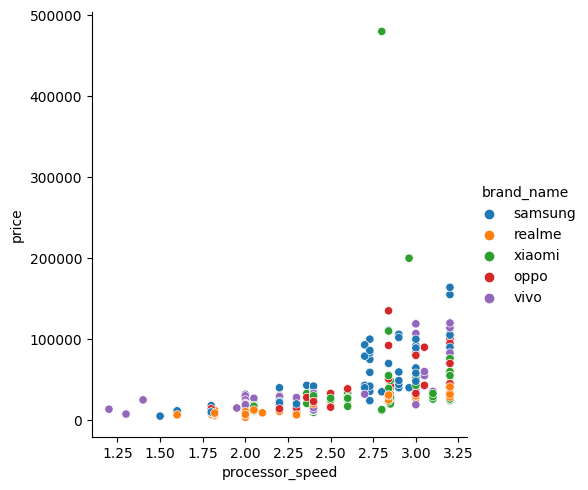

In [12]:
sns.relplot(y='price',x='processor_speed',hue='brand_name',data=df2)

/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


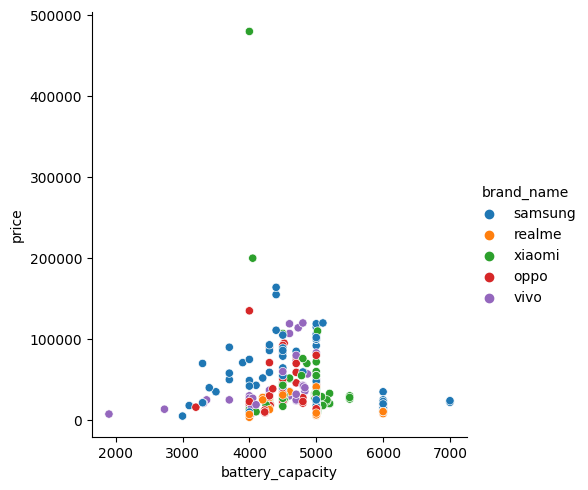

In [13]:
sns.relplot(y='price',x='battery_capacity',hue='brand_name',data=df2)

/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203094/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


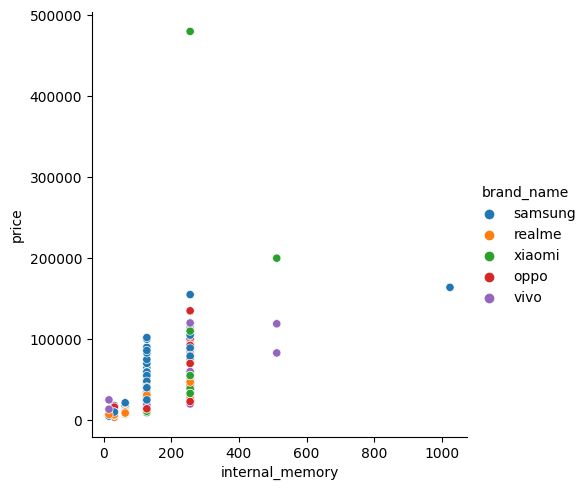

In [14]:
sns.relplot(y='price',x='internal_memory',hue='brand_name',data=df2)